In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [131]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [132]:
# Scoring features >>>

# df['blue_engi_score'] = df['redTotalExperience']

In [287]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'interaction'],
      dtype='object')

In [134]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [305]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,9879.0,4.500084e+09,2.757328e+07,4.295358e+09,4.483301e+09,4.510920e+09,4.521733e+09,4.527991e+09
blueWins,9879.0,4.990384e-01,5.000244e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueWardsPlaced,9879.0,2.228829e+01,1.801918e+01,5.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,2.500000e+02
blueWardsDestroyed,9879.0,2.824881e+00,2.174998e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
blueFirstBlood,9879.0,5.048082e-01,5.000022e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueKills,9879.0,6.183925e+00,3.011028e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueDeaths,9879.0,6.137666e+00,2.933818e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueAssists,9879.0,6.645106e+00,4.064520e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,2.900000e+01
blueEliteMonsters,9879.0,5.499544e-01,6.255265e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
blueDragons,9879.0,3.619800e-01,4.805974e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [144]:
df.groupby('blueWins')[
    'redTotalExperience',
    'blueTotalExperience'].mean().T

C:\Users\Coalescence\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


blueWins,0,1
redTotalExperience,18425.37058,17496.303448
blueTotalExperience,17453.47161,18404.577890


In [318]:
df['interaction'] = (df['redTotalGold'] * df['redTotalExperience']) / (df['blueTotalGold'] * df['blueTotalExperience'])


X = df[['interaction', 'redTotalGold', 'redTotalExperience', 'blueTotalGold', 'blueTotalExperience']]  
y = df['blueWins'] 


print(X.shape)
print(y.shape)

# Conduct a train/test split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# Instantiate model as lr.
lr = LogisticRegression(solver= 'lbfgs')

(9879, 5)
(9879,)


In [307]:
# Fit model.
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [308]:
# View coefficients.
lr.coef_

array([[ 8.49507648e-08,  4.30460622e-04,  2.29777878e-04,
        -4.32346837e-04, -2.27582280e-04]])

In [309]:
np.exp(lr.coef_)

array([[1.00000008, 1.00043055, 1.0002298 , 0.99956775, 0.99977244]])

In [310]:
# Generate predictions.
preds = lr.predict(X_test)

confusion_matrix(y_test,
                 preds)

array([[884, 350],
       [338, 898]], dtype=int64)

In [311]:
tn, fp, fn, tp = confusion_matrix(y_test, # True values.
                                  preds).ravel()

In [312]:
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

Specificity: 0.7164


In [313]:
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.7265


In [314]:
lr.predict_proba(X_test.head())

array([[0.07166158, 0.92833842],
       [0.75448963, 0.24551037],
       [0.59563838, 0.40436162],
       [0.69579554, 0.30420446],
       [0.13152189, 0.86847811]])

In [315]:
pred_proba = [i[1] for i in lr.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [316]:
pred_df.head()

,true_values,pred_probs
4818,1,0.928338
952,0,0.245510
9023,0,0.404362
5212,0,0.304204
7244,1,0.868478


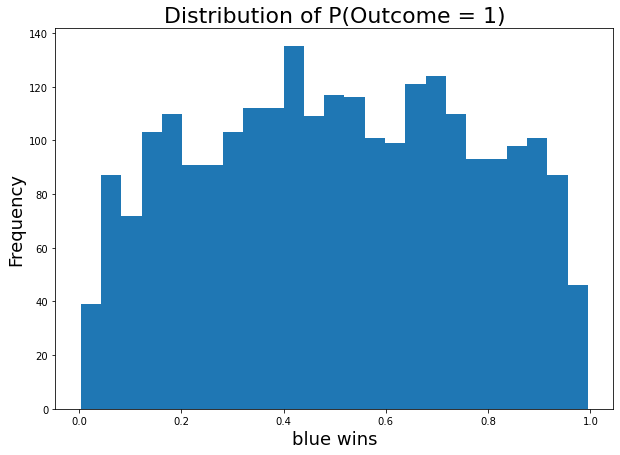

In [317]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations with 25 bins.
plt.hist(pred_df['pred_probs'],
         bins = 25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('blue wins', fontsize=18);

In [300]:
X.head()

,interaction,redTotalGold,redTotalExperience,blueTotalGold,blueTotalExperience
0,0.963090,16567,17047,17210,17039
1,1.284035,17620,17438,14712,16265
2,1.141051,17285,17254,16113,16221
3,1.087578,16478,17961,15157,17954
4,1.048057,17404,18313,16400,18543


In [268]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: blueWins, dtype: int64

In [269]:
model = LinearRegression()

model.fit(X, y)

y_preds = model.predict(X)

In [270]:
def MSE(y_true, y_hat):
    difference = y_true - y_hat
    squared_difference = difference ** 2
    mean_squared_difference = np.mean(squared_difference)
    return mean_squared_difference

MSE(y, y_preds)

0.18335103533149003

In [271]:
model.intercept_

0.3286877584840241

In [272]:
model.coef_

array([ 9.64479209e-02, -8.16359977e-05, -4.49142304e-05,  7.96368989e-05,
        5.07181922e-05])

In [273]:
y_preds = model.predict(X)

In [274]:
MSE(y, y_preds)

0.18335103533149003

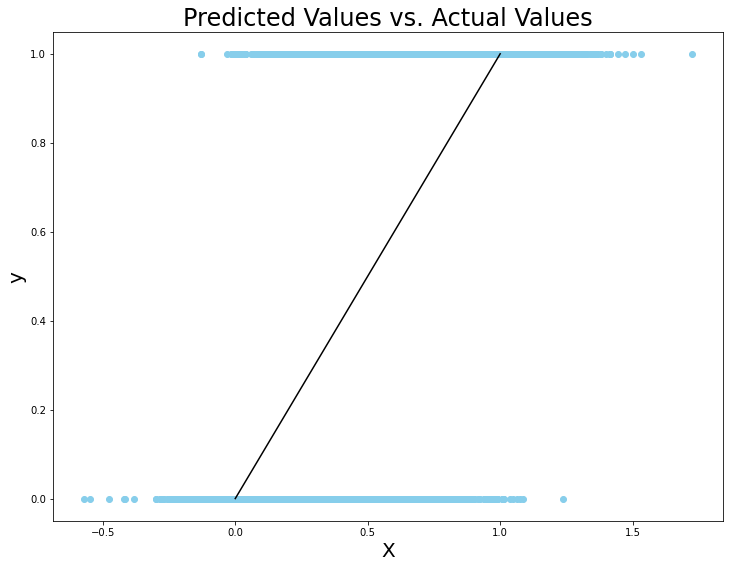

In [275]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y, color='skyblue')

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel('X', fontsize = 20)
plt.ylabel("y", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,  
                                                   y,
                                                   test_size = 0.33,   # set test size
                                                   random_state = 42)

# Instantiate a linear regression model.
linmod = LinearRegression()    # add in lin regression model!

# Fit our linear regression model to the training data.
linmod.fit(X_train, y_train)

# Print out intercept and coefficients.
print(f'Intercept: {linmod.intercept_}')
print(f'Coefficient: {linmod.coef_}')

Intercept: 0.2513595075949492
Coefficient: [ 1.20484340e-01 -8.35029304e-05 -4.31922911e-05  8.37451420e-05
  4.97723008e-05]


In [278]:
# Step 1: Instantiate our model.
logreg = LogisticRegression(solver = 'lbfgs')

# Step 2: Fit our model.
logreg.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-4.89438451e-09]
Logistic Regression Coefficient: [[-8.91247522e-08 -4.25232084e-04 -2.35757927e-04  4.32889776e-04
   2.28181383e-04]]


In [279]:
print(f'Logistic Regression Accuracy Score: {logreg.score(X_test, y_test)}')

Logistic Regression Accuracy Score: 0.7249310027598896


In [283]:
# 1 >>> blueWin
# 0 >>> blueLoss
# Split the data into the training and testing sets >>>
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y)

# pipe it >>>
# 2. LogisticRegression (estimator)
pipe = Pipeline([
    ('lr', LogisticRegression(solver = 'lbfgs'))
])

In [284]:
# Step 1: Instantiate our model.
logreg = LogisticRegression(solver = 'lbfgs')

# Step 2: Fit our model.
logreg.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-5.82650894e-09]
Logistic Regression Coefficient: [[-9.01511296e-08 -4.19496004e-04 -2.66555195e-04  4.34340500e-04
   2.53285396e-04]]
